In [3]:
from useful_scit.imps import *
# plt.style.use('Solarize_Light2')
plt.style.use('seaborn')
mpl.rcParams['figure.dpi'] = 100
# mpl.rcParams['figure.figsize']=[4.0, 3.0]
# %config InlineBackend.figure_format = 'retina'

In [16]:
sys.path.insert(0,'../util/')
import funs
import fix_co
importlib.reload(funs);
importlib.reload(fix_co);

In [5]:
# df_hm = fix_co.get_maap_horiba_data()
# df_hm1 = fix_co.process_df_hm(df_hm)
# df_hm1.to_hdf('../data/maap_horiva_pd_data.h5','w')

In [6]:
df_hm1 = pd.read_hdf('../data/maap_horiva_pd_data.h5')

In [7]:
xs_co = funs.open_sat_co('../data/co_sat/')

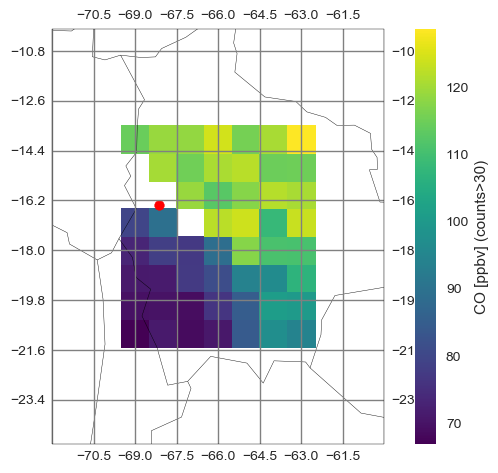

In [8]:
ax=fix_co.plot_co_sat(xs_co)

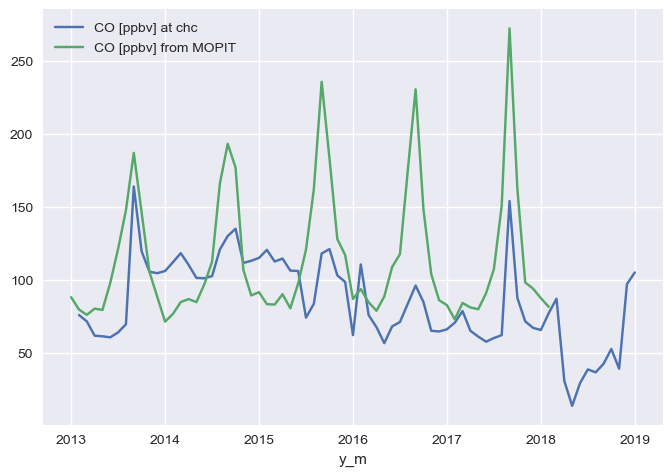

In [9]:
fix_co.plot_mopit_vs_hor(xs_co,df_hm1)

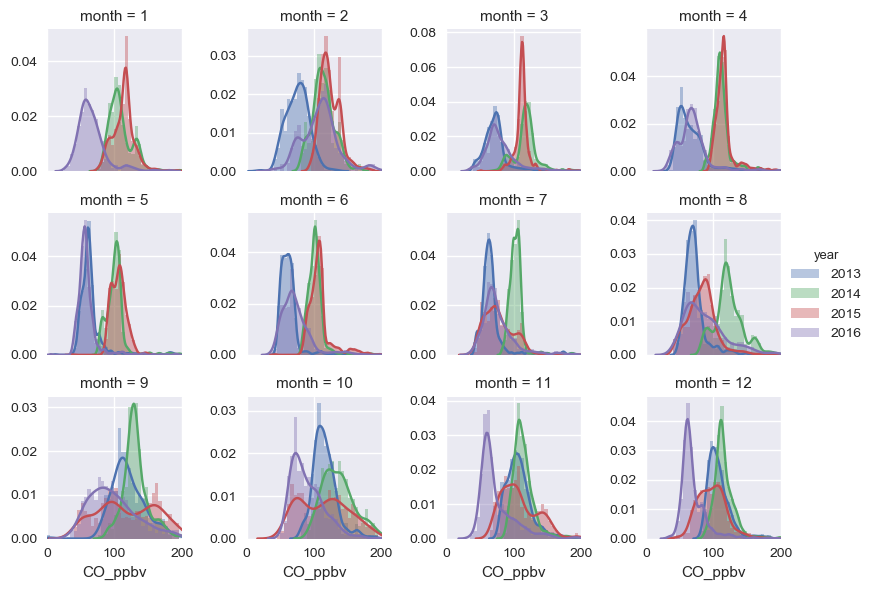

In [10]:
import warnings; warnings.simplefilter('ignore')
fix_co.plot_dists([2012,2013,2014,2015,2016],df_hm1)


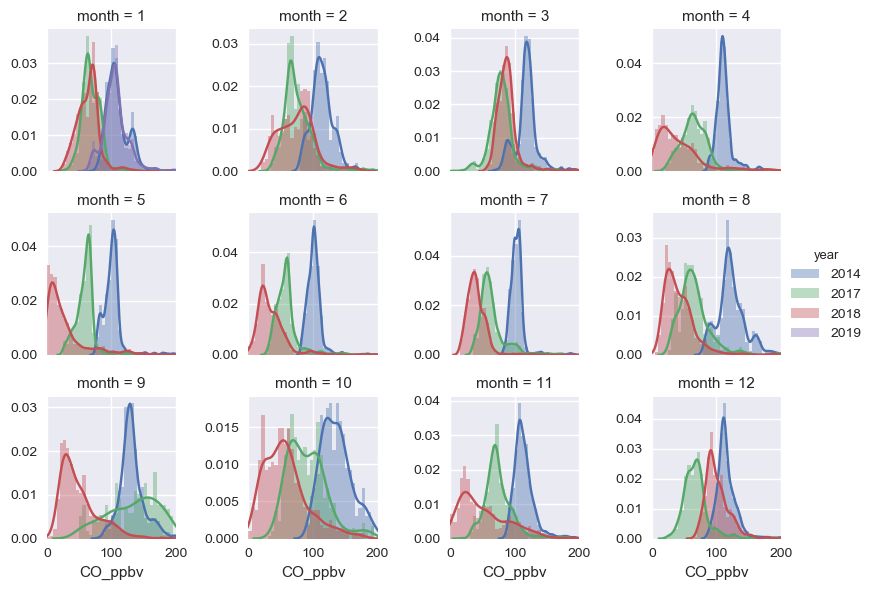

In [11]:
import warnings; warnings.simplefilter('ignore')
fix_co.plot_dists([2014,2017,2018,2019],df_hm1)

In [12]:
#info given by fernando: calibration horiba
periods = {
    'p1':{'t1':'2013-02-01 00','t2':'2013-09-03 23'},
    'p2':{'t1':'2014-09-04 00','t2':'2015-07-07 23'}, #good one
    'p3':{'t1':'2015-07-08 00','t2':'2018-03-30 23'},
    'p4':{'t1':'2018-03-31 00','t2':'2018-11-26 23'},
}

In [348]:
vag = np.histogram(dfg.CO_ppbv.dropna().values,bins,normed=True)[0]
vab = np.histogram(dfb.CO_ppbv.dropna().values,bins,normed=True)[0]

In [343]:
dfg=df_hm1[select(periods[good])][df_hm1.month==4]
dfb=df_hm1[select(periods['p4'])][df_hm1.month==4]


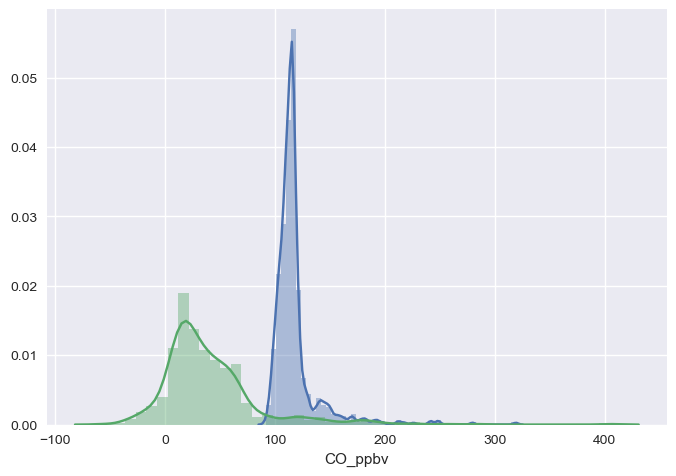

In [345]:
ax = sns.distplot(dfg.CO_ppbv.dropna())
ax = sns.distplot(dfb.CO_ppbv.dropna())

In [347]:
bins = np.arange(-500,500,1)

In [348]:
vag = np.histogram(dfg.CO_ppbv.dropna().values,bins,normed=True)[0]
vab = np.histogram(dfb.CO_ppbv.dropna().values,bins,normed=True)[0]

In [14]:
hig = np.histogram(dfg.CO_ppbv.dropna().values,bins,normed=True)[0]
vab = dfb.CO_ppbv.dropna().values
def minimize_me(X,vab,hig,bins):
    hib = np.histogram(vab*X[0]+X[1],bins,normed=True)[0]
    res = np.sqrt(((gaussian_filter1d(hib,2)-gaussian_filter1d(hig,2))**2).sum())
    return res


NameError: name 'dfg' is not defined

In [384]:
df_hm2=df_hm1.copy()
res = find_corr(df_hm1,periods,'p2','p1',4)
df_hm2.loc[select(periods['p1']),'CO_ppbv']=df_hm2.loc[select(periods['p1']),'CO_ppbv']*res['x']+res['y']
res = find_corr(df_hm1,periods,'p2','p3',4)
df_hm2.loc[select(periods['p3']),'CO_ppbv']=df_hm2.loc[select(periods['p3']),'CO_ppbv']*res['x']+res['y']
res = find_corr(df_hm1,periods,'p2','p4',4)
df_hm2.loc[select(periods['p4']),'CO_ppbv']=df_hm2.loc[select(periods['p4']),'CO_ppbv']*res['x']+res['y']

In [351]:
xl=101
yl=102
X = np.linspace(.2,2,xl)
Y = np.linspace(1,200,yl)
Z = np.zeros((xl,yl))

In [353]:
xa=xr.DataArray(Z,coords=[X,Y],dims=['X','Y'])

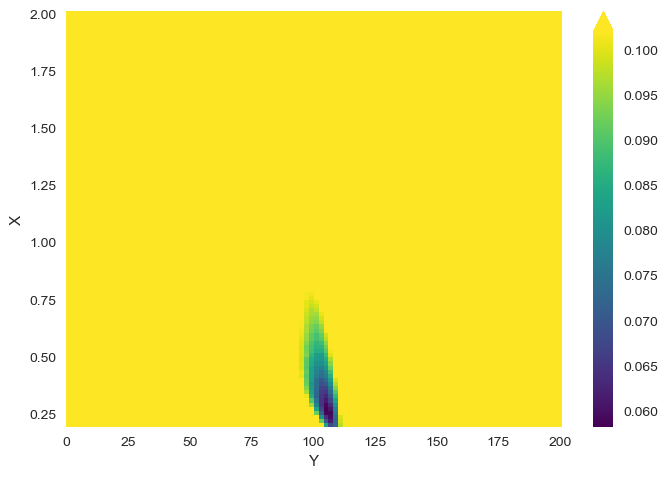

In [356]:
xa.plot(vmax=.102)

In [357]:
xa.where(xa==xa.min(),drop=True).squeeze()

<xarray.DataArray ()>
array(0.058198)
Coordinates:
    X        float64 0.272
    Y        float64 105.4